# DATA PREPARATION

In [11]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [12]:
 ##Download, load , visualise, normalise

In [13]:
X = pd.read_csv("Linear_X_Train.csv")
y = pd.read_csv("Linear_Y_Train.csv")

C:\Users\Lakshay\AppData\Local\Temp\ipykernel_13420\3402035221.py:1: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn')


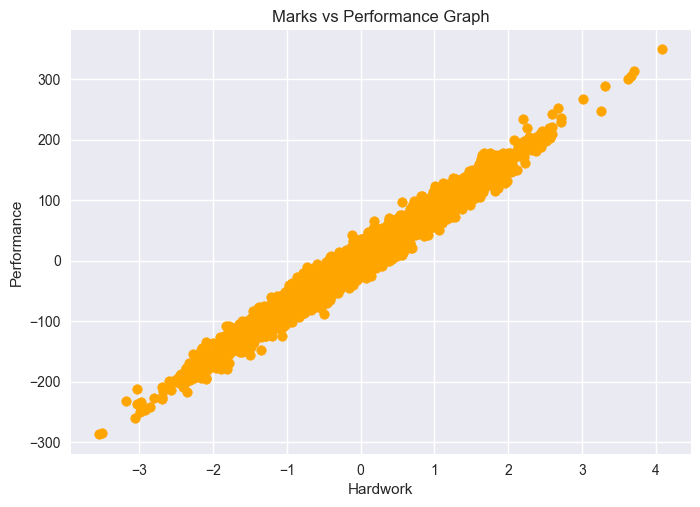

In [14]:
plt.style.use('seaborn')
plt.scatter(X,y, color = "orange")
plt.title("Marks vs Performance Graph")
plt.xlabel("Hardwork")
plt.ylabel("Performance")
plt.show()

In [15]:
X = X.values
y = y.values

In [16]:
u = X.mean()
std = X.std()
X = (X - u)/ std

# Linear Regression

In [29]:
def hypothesis(x, theta):
    #theta = [theta0, theta1]
    
    y_ = theta[0] + theta[1]*x
    return y_

In [30]:
def gradient(X, Y, theta):
    m = X.shape[0]
    grad = np.zeros((2,))
    for i in range (0,m):
        y_ = hypothesis(X[i], theta)
        y = Y[i]
        grad[0] += y_ - y
        grad[1] += (y_ - y)*X[i]
        
    return grad / m

In [31]:
def error(X,Y, theta):
    m = X.shape[0]
    total_error = 0.0
    for i in range (m):
        y_ = hypothesis(X[i],theta)
        total_error += (y_ - Y[i]) ** 2
    return total_error / m

In [32]:
def gradientDescent(X,Y,max_steps = 100,learning_rate = 0.1):
    theta = np.zeros((2,))
    error_list = []
    for i in range (max_steps):
        #update theta
        grad = gradient(X,Y,theta)
        e = error(X,Y,theta)
        error_list.append(e)
        theta[0] = theta[0] - learning_rate * grad[0]
        theta[1] = theta[1] - learning_rate * grad[1] 
    return theta, error_list

In [33]:
theta,error_list=gradientDescent(X,y)

In [34]:
print(error_list)

[array([6576.35005246]), array([5363.12510257]), array([4380.41289317]), array([3584.41600355]), array([2939.65852295]), array([2417.40496367]), array([1994.37958066]), array([1651.72902041]), array([1374.18206661]), array([1149.36903404]), array([967.27047765]), array([819.77064698]), array([700.29578413]), array([603.52114523]), array([525.13368772]), array([461.63984713]), array([410.20983626]), array([368.55152745]), array([334.80829731]), array([307.47628091]), array([285.33734761]), array([267.40481165]), array([252.87945752]), array([241.11392067]), array([231.58383582]), array([223.8644671]), array([217.61177843]), array([212.54710061]), array([208.44471157]), array([205.12177646]), array([202.43019901]), array([200.25002128]), array([198.48407732]), array([197.05366271]), array([195.89502687]), array([194.95653185]), array([194.19635088]), array([193.58060429]), array([193.08184956]), array([192.67785822]), array([192.35062524]), array([192.08556653]), array([191.87086897]), a

In [35]:
print(theta)

[ 0.6838508  79.90361453]


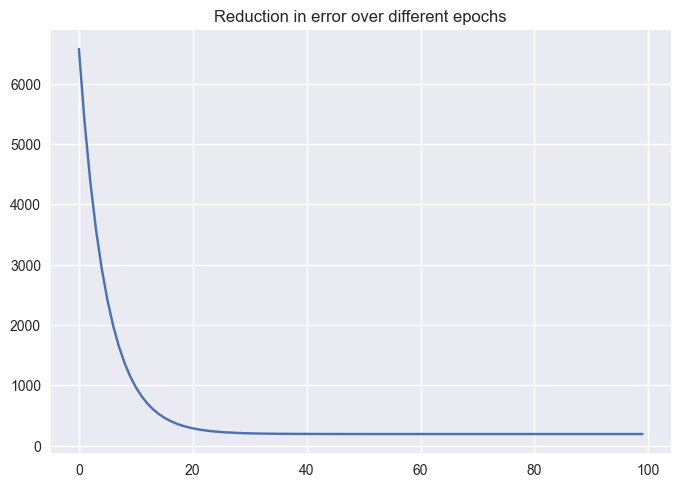

In [38]:
plt.plot(error_list)
plt.title("Reduction in error over different epochs")
plt.show()

# Predictions and Best Line

In [39]:
y_ = hypothesis(X,theta )
print(y_)

[[-19.5733619 ]
 [-43.69571729]
 [ 86.4848761 ]
 ...
 [-20.85044708]
 [138.70197319]
 [-35.87897262]]


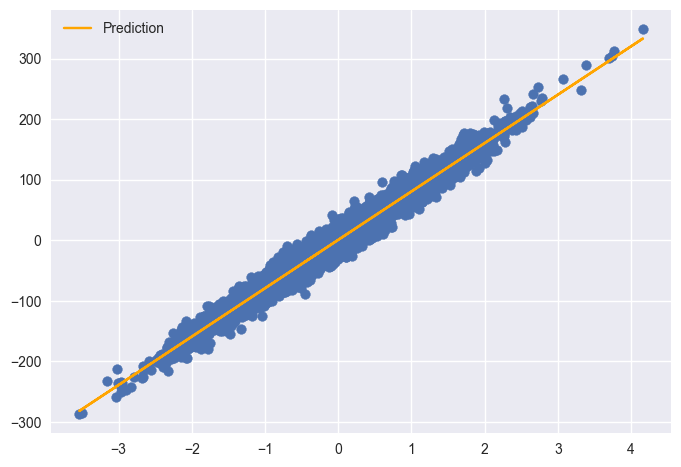

In [41]:
#Training + predictions
plt.scatter(X,y)
plt.plot(X,y_, color = "orange", label = 'Prediction')
plt.legend()
plt.show()

               x
0    -149.370696
1     -68.754940
2    -201.486870
3     221.234243
4      47.906897
...          ...
1245  -12.744630
1246   75.171802
1247   10.912138
1248  -21.532358
1249  -53.684600

[1250 rows x 1 columns]


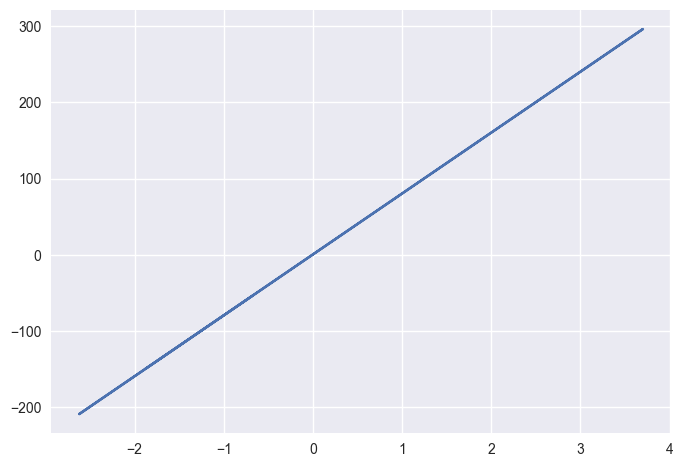

In [55]:
X_test = pd.read_csv('Linear_X_Test.csv')
y_test = hypothesis(X_test, theta)
print(y_test)
# y_test.shape
plt.plot(X_test,y_test)

In [44]:
df = pd.DataFrame(data=y_test,columns=["y"])

In [48]:
df.to_csv('y_prediction.csv', index = False)